In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [3]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test_original = test.copy()
train_original = train.copy()

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train.shape,test.shape

((614, 13), (367, 12))

#### Univariate Analysis

In [10]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

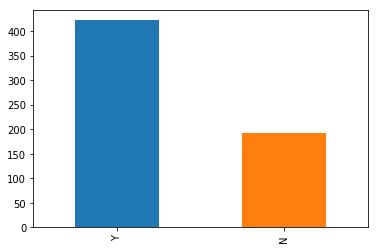

In [12]:
train.Loan_Status.value_counts().plot.bar()

The loan of 422(around 69%) people out of 614 was approved.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

    Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
    Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
    Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)
Let’s visualize the categorical and ordinal features first.

#### Independent Variable (Categorical)

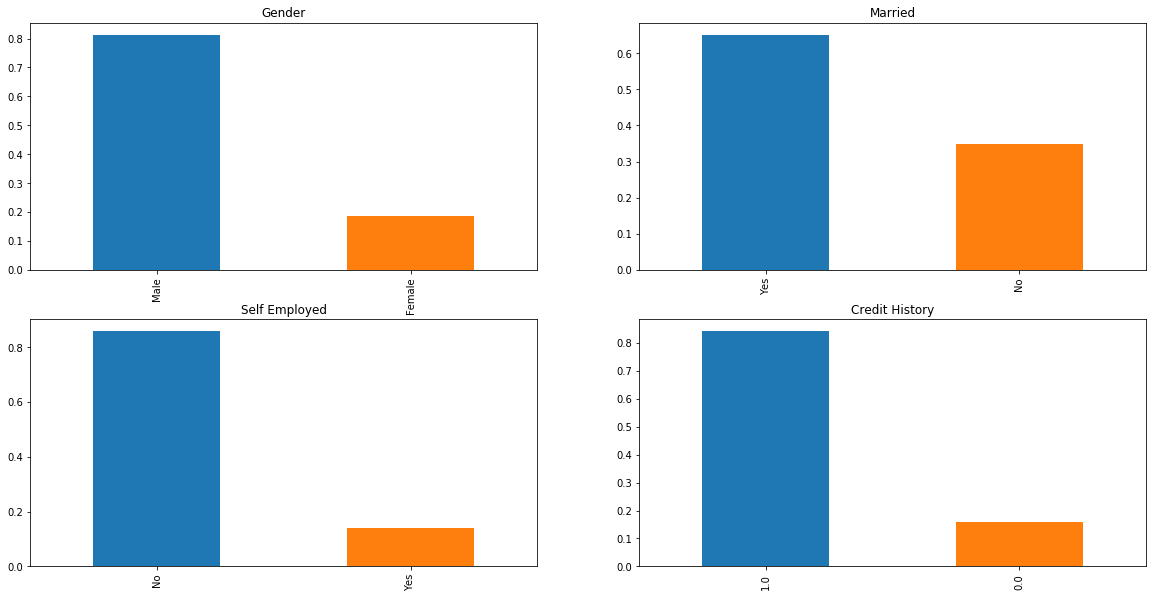

In [13]:
plt.figure(1)
plt.subplot(221)
train.Gender.value_counts(normalize=True).plot.bar(figsize=(20,10), title = 'Gender')

plt.subplot(222)
train.Married.value_counts(normalize=True).plot.bar(figsize=(20,10), title='Married')

plt.subplot(223)
train.Self_Employed.value_counts(normalize=True).plot.bar(figsize=(20,10), title='Self Employed')

plt.subplot(224)
train.Credit_History.value_counts(normalize=True).plot.bar(figsize=(20,10), title='Credit History')

It can be inferred from the above bar plots that:

    80% applicants in the dataset are male.
    Around 65% of the applicants in the dataset are married.
    Around 15% applicants in the dataset are self employed.
    Around 85% applicants have repaid their debts.

Now let’s visualize the ordinal variables.

#### Independent Variable (Ordinal)

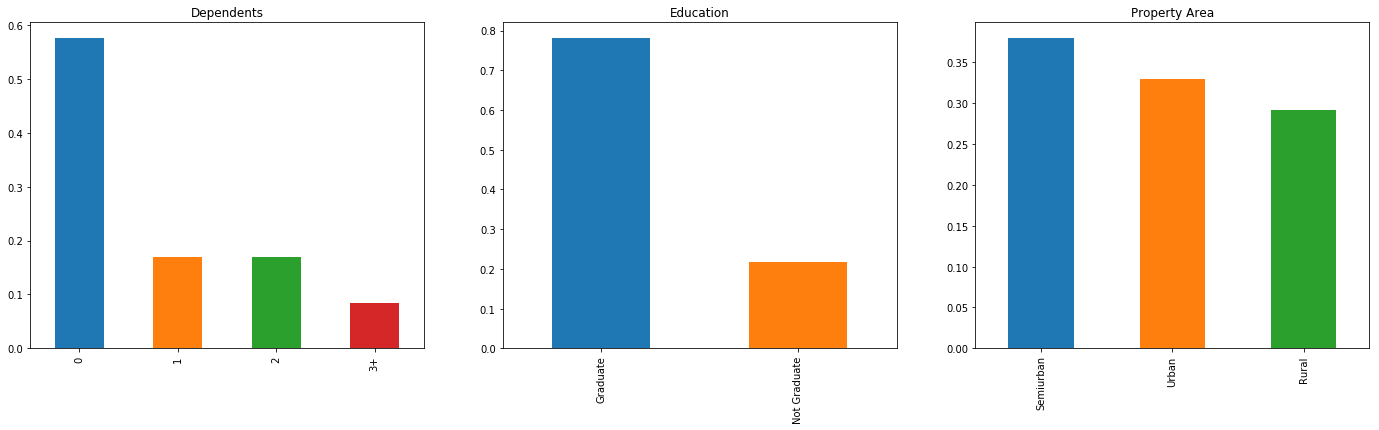

In [14]:
plt.figure(1)
plt.subplot(131)
train.Dependents.value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train.Education.value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train.Property_Area.value_counts(normalize=True).plot.bar(title= 'Property Area')

Following inferences can be made from the above bar plots:

    Most of the applicants don’t have any dependents.
    Around 80% of the applicants are Graduate.
    Most of the applicants are from Semiurban area.

#### Independent Variable (Numerical)

lets look at the distribution of Applicants Income first 

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


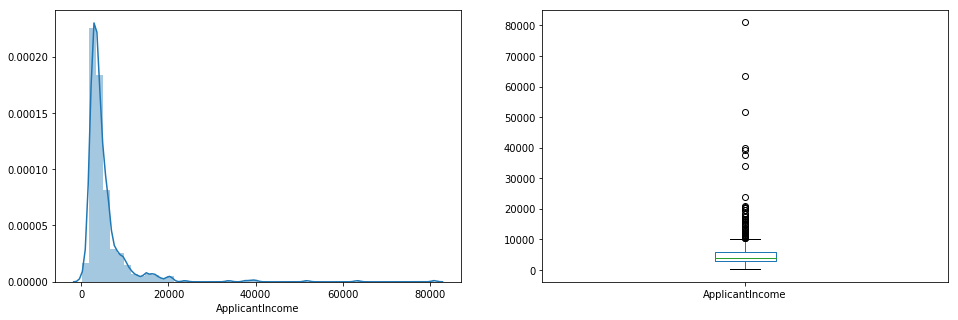

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train.ApplicantIncome);

plt.subplot(122)
train.ApplicantIncome.plot.box(figsize=(16,5))

We can see here that the distribution is not normal

Let's segregate the box plot by Education

Text(0.5, 0.98, '')

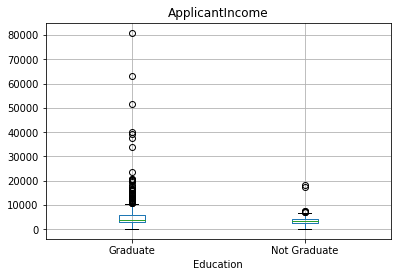

In [16]:
train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle('')

We can see that there are a larger number of graduates with very high incomes, which are appearing to be the outliers.

Let’s look at the Coapplicant income distribution.

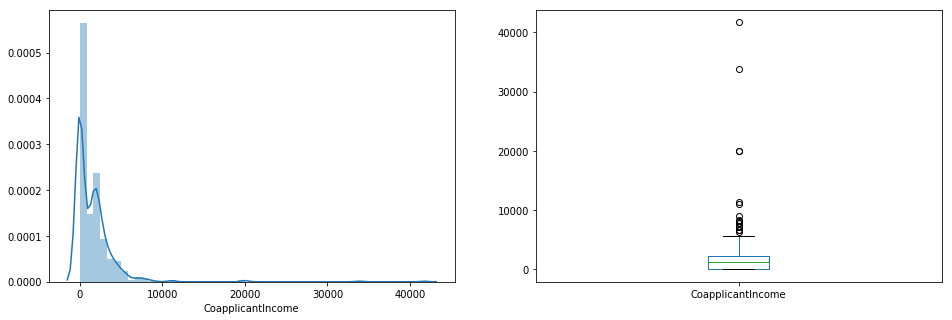

In [17]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train.CoapplicantIncome);

plt.subplot(122)
train.CoapplicantIncome.plot.box(figsize=(16,5))

We see a similar distribution like Applicants Income

Let’s look at the distribution of LoanAmount variable.

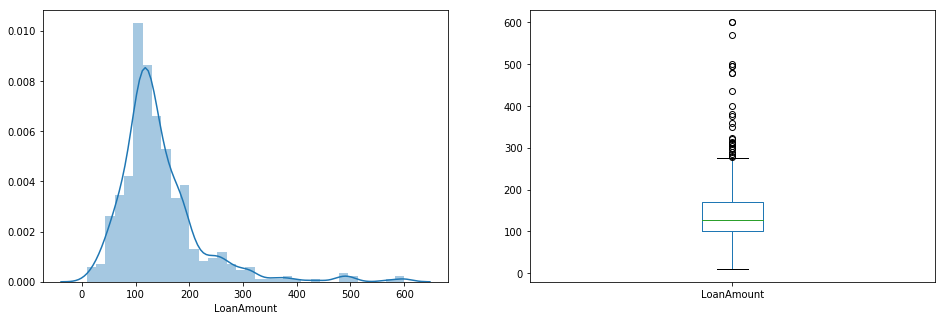

In [18]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df.LoanAmount);

plt.subplot(122)
df.LoanAmount.plot.box(figsize = (16,5))

We see a lot of outliers in this variable and the distribution is fairly normal.

### Bivariate Analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

### Categorical Independent Variable vs Target Variable

First of all we find the relation between target variable and categorical values (Gender, Married, Dependents, Education, Self_Employed)

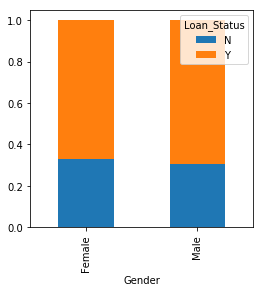

In [19]:
Gender = pd.crosstab(train.Gender, train.Loan_Status)
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind='Bar', stacked = True, figsize = (4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

Now let us visualize the remaining categorical variables vs target variable.

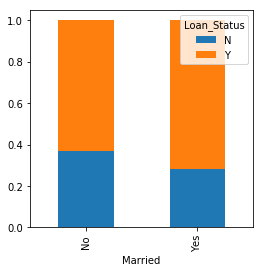

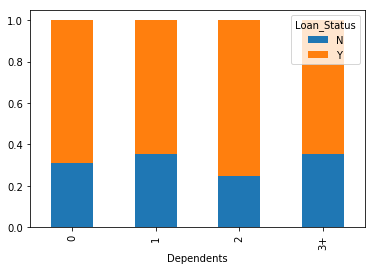

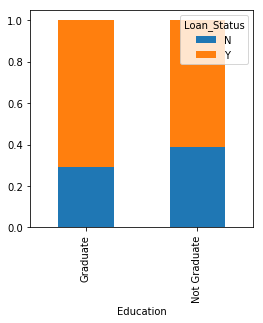

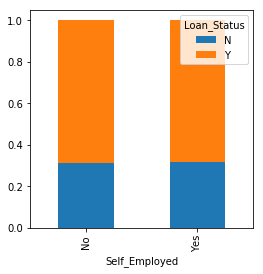

In [20]:
Married = pd.crosstab(train.Married, train.Loan_Status);
Dependents = pd.crosstab(train.Dependents, train.Loan_Status);
Education = pd.crosstab(train.Education, train.Loan_Status);
Self_Employed = pd.crosstab(train.Self_Employed, train.Loan_Status);

Married.div(Married.sum(1).astype(float),axis = 0).plot(kind ='Bar', stacked = True, figsize = (4,4));
Dependents.div(Dependents.sum(1).astype(float),axis = 0).plot(kind='Bar', stacked=True);
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='Bar', stacked=True, figsize=(4,4));
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='Bar', stacked=True, figsize=(4,4));

Now we will look at the relationship between remaining categorical independent variables and Loan_Status.

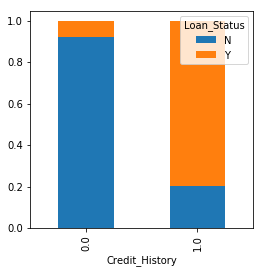

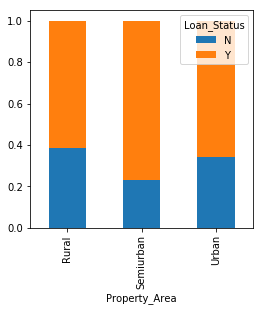

In [21]:
Credit_History = pd.crosstab(train.Credit_History, train.Loan_Status)
Property_Area = pd.crosstab(train.Property_Area, train.Loan_Status)

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='Bar', stacked=True, figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='Bar', stacked=True, figsize=(4,4)) 

    It seems people with credit history as 1 are more likely to get their loans approved.
    Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Now let’s visualize numerical independent variables with respect to target variable.

#### Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

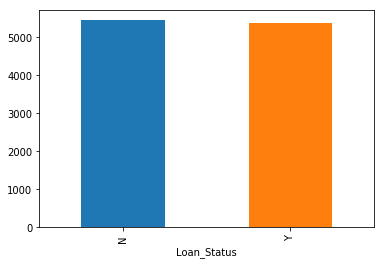

In [22]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

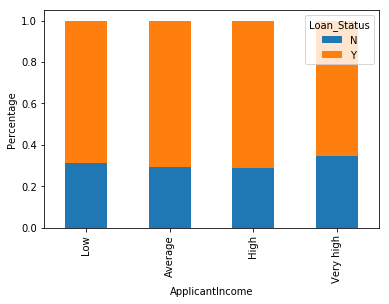

In [23]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar manner.

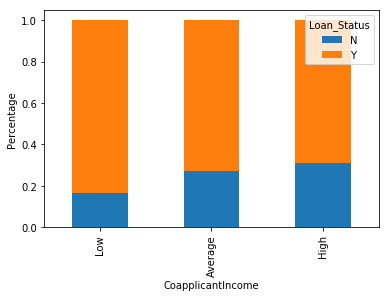

In [24]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [25]:
train['Total_Income'] = train.ApplicantIncome + train.CoapplicantIncome

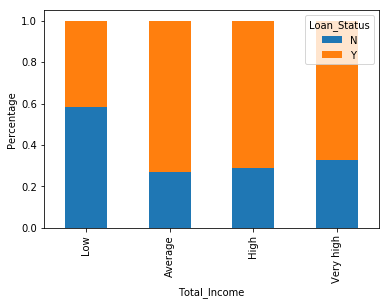

In [26]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

Now, let's visualize the Loan_Amount variable

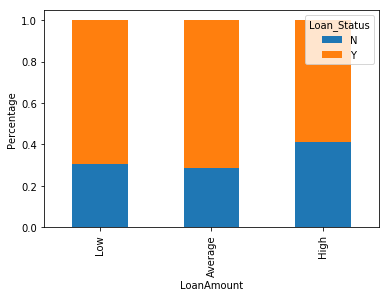

In [27]:
bins = [0,100,200,700]
group = ['Low', 'Average', 'High']
train['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train.LoanAmount_bin, train.Loan_Status)
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='Bar', stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables.

In [28]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'Total_Income_bin', 'LoanAmount_bin', 'Total_Income'], axis=1)

In [29]:
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

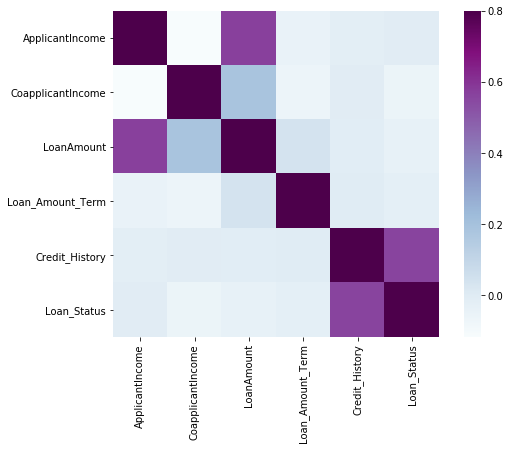

In [30]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu')

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

#### Missing value imputation

In [31]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.
We can consider these methods to fill the missing values:

    For numerical variables: imputation using mean or median
    For categorical variables: imputation using mode
There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [32]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [33]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [34]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [35]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [36]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [38]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [39]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Outlier Treatment

Having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

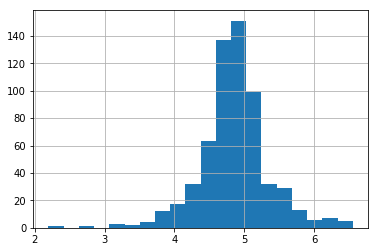

In [40]:
train['LoanAmount_log']= np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

    Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
    Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [41]:
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis=1)

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset

In [42]:
X=train.drop('Loan_Status', axis=1)
y = train.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

    Consider the “Gender” variable. It has two classes, Male and Female.
    As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
    Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
    Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [43]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
model = LogisticRegression()
model.fit(x_train, y_train)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [48]:
pred_cv = model.predict(x_cv)

In [49]:
accuracy_score(y_cv,pred_cv)

0.8

In [50]:
pred_test = model.predict(test)

In [51]:
submission=pd.read_csv("Sample_Submission_ZAuTl8O_FK3zQHh.csv")

In [52]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [53]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [54]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic_arnav.csv')

## -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Logistic Regression using stratified k-folds cross validation

To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

    The validation set approach
    k-fold cross validation
    Leave one out cross validation (LOOCV)
    Stratified k-fold cross validation

#### Stratified k-fold cross validation

    Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.
    For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises 
    of about half the instances.
    It is generally a better approach when dealing with both bias and variance.
    A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.

In [55]:
from sklearn.model_selection import StratifiedKFold

In [56]:
i=1
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y.loc[train_index], y.loc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    i+=1
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The mean validation accuracy for this model turns out to be 0.81. Let us visualize the roc curve.

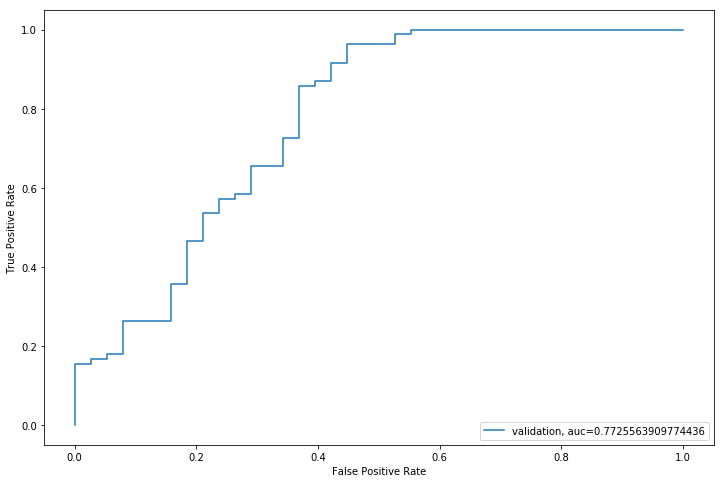

In [57]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [58]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [59]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [60]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic_arnav1.csv')

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

    Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
    EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
    Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [61]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


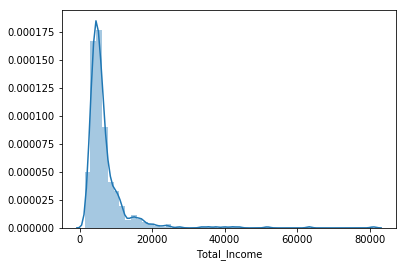

In [62]:
sns.distplot(train['Total_Income']);

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

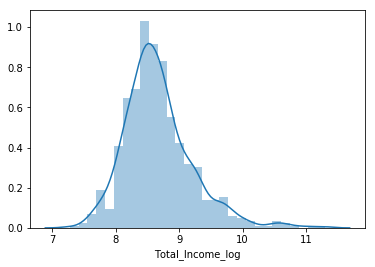

In [63]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s create the EMI feature now.

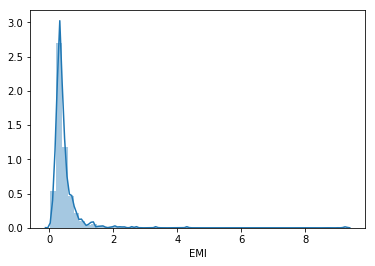

In [64]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI']);

Let us create Balance Income feature now and check its distribution.

In [65]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

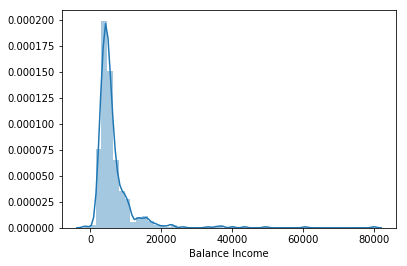

In [66]:
sns.distplot(train['Balance Income']);

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [67]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [68]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

Logistic Regressioin

In [69]:
i=1
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y.loc[train_index], y.loc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    i+=1
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7786885245901639

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.819672131147541


/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

In [70]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [71]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [72]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic_arnav2.csv')

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Decision Tree

Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

In [73]:
from sklearn import tree

In [74]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = tree.DecisionTreeClassifier(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7258064516129032

2 of kfold 5
accuracy_score 0.7419354838709677

3 of kfold 5
accuracy_score 0.7049180327868853

4 of kfold 5
accuracy_score 0.680327868852459

5 of kfold 5
accuracy_score 0.7049180327868853


In [75]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree_arnav.csv')

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Random Forest

    RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
    For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
    Final prediction can be a function of all the predictions made by the individual learners.
    In case of regression problem, the final prediction can be mean of all the predictions.

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=10)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8225806451612904

2 of kfold 5
accuracy_score 0.8145161290322581

3 of kfold 5
accuracy_score 0.7377049180327869

4 of kfold 5
accuracy_score 0.7295081967213115

5 of kfold 5
accuracy_score 0.8114754098360656


/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-pa

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

In [78]:
from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

# Fit the grid search model
grid_search.fit(x_train,y_train)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=141, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

So, the optimized value for the max_depth variable is 3 and for n_estimator is 41. Now let’s build the model using these optimized values.

In [80]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7786885245901639

5 of kfold 5
accuracy_score 0.819672131147541


In [81]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest_arnav.csv')

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so.

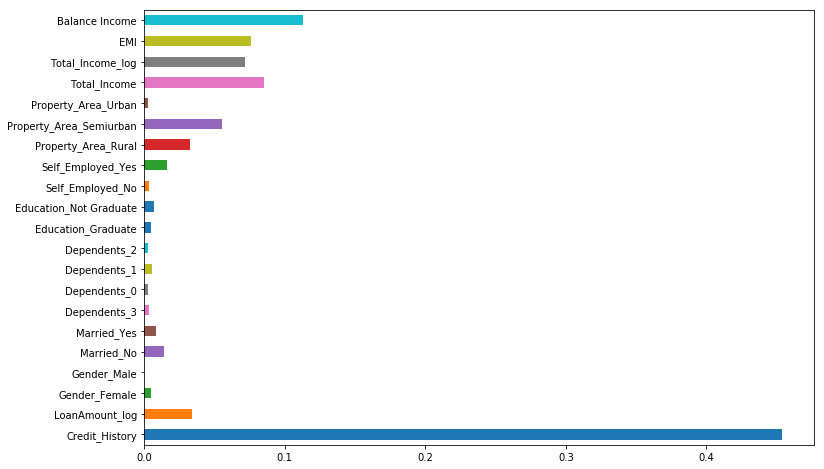

In [82]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

We can see that Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable.

#### XGBoost

XGBoost is a fast and efficient algorithm
XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables. Let’s have a look at the parameters that we are going to use in our model.

    n_estimator: This specifies the number of trees for the model.
    max_depth: We can specify maximum depth of a tree using this parameter

In [87]:
!conda install -c conda-forge xgboost --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    libxgboost-0.81            |    hf484d3e_1000         3.8 MB  conda-forge
    cryptography-2.4.2         |   py36h1ba5d50_0         618 KB
    py-xgboost-0.81            |py36hf484d3e_1000          66 KB  conda-forge
    xgboost-0.81               |py36hf484d3e_1000           9 KB  conda-forge
    openssl-1.1.1a             |    h14c3975_1000         4.0 MB  conda-forge
    libarchive-3.3.3           |       h5d8350f_5         1.5 MB
    grpcio-1.16.1              |   py36hf8bcb03_1         1.1 MB
    conda-4.6.2                |           py36_0         869 KB  conda-forge
    libssh2-1.8.0              |                1       

In [88]:
from xgboost import XGBClassifier

In [89]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = XGBClassifier(n_estimators=50, max_depth=4)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)
pred3=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.782258064516129

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7622950819672131

4 of kfold 5
accuracy_score 0.7459016393442623

5 of kfold 5
accuracy_score 0.7868852459016393


In [90]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost_arnav.csv')